To install Pyomo:  conda install -c conda-forge pyomo </br>
To install glpk:  conda install -c conda-forge glpk

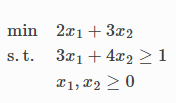

In [1]:
import pyomo.environ as pyo
from pyomo.opt import SolverFactory

In [2]:
#Small concrete model example as shown above
model = pyo.ConcreteModel()

model.x = pyo.Var([1,2], domain=pyo.NonNegativeReals)

model.OBJ = pyo.Objective(expr = 2*model.x[1] + 3*model.x[2])

model.Constraint1 = pyo.Constraint(expr = 3*model.x[1] + 4*model.x[2] >= 1)

In [3]:
opt = pyo.SolverFactory('glpk')
opt.solve(model) 

{'Problem': [{'Name': 'unknown', 'Lower bound': 0.666666666666667, 'Upper bound': 0.666666666666667, 'Number of objectives': 1, 'Number of constraints': 2, 'Number of variables': 3, 'Number of nonzeros': 3, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.03124260902404785}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

# Baby L1 03by0004-01-01
Response
0.307118323
-3.560866224
-0.8175538009
32.62916794
</br>
Explanatory1
50.2415881
-11.20589167
46.87700307
22.86429424
</br>
Explanatory2
-45.18595533
-52.24616322
-48.37284647
-49.5144371

In [10]:
#Small concrete L1 regression LP model of dataset 03by0004-01-01 in Experiments Google Sheet file

#Data columns are created as a list. Each column is a list
response=[0.307118323,-3.560866224,-0.8175538009,32.62916794]
explanatory1=[50.2415881,-11.20589167,46.87700307,22.86429424]
explanatory2=[-45.18595533,-52.24616322,-48.37284647,-49.5144371]

#Creating a Pyomo model object. There are two types of model objects 1-ConcereteModel (spesific notation) 2-AbstractModel (generalized notation)
model = pyo.ConcreteModel()

#Creating Pyomo variable objects
model.betaValues = pyo.Var([1,2,3])
model.zPlus = pyo.Var([1,2,3,4], domain=pyo.NonNegativeReals)
model.zMinus = pyo.Var([1,2,3,4], domain=pyo.NonNegativeReals)

#Creating the objective function object
model.OBJ = pyo.Objective(expr = model.zPlus[1] + model.zPlus[2] + model.zPlus[3] + model.zPlus[4] + model.zMinus[1] + model.zMinus[2] + model.zMinus[3] + model.zMinus[4])

#Creating the constraint objects
model.Constraint1 = pyo.Constraint(expr = model.betaValues[1] + explanatory1[0]*model.betaValues[2] + explanatory2[0]*model.betaValues[3] + model.zPlus[1] - model.zMinus[1] == response[0])
model.Constraint2 = pyo.Constraint(expr = model.betaValues[1] + explanatory1[1]*model.betaValues[2] + explanatory2[1]*model.betaValues[3] + model.zPlus[2] - model.zMinus[2] == response[1])
model.Constraint3 = pyo.Constraint(expr = model.betaValues[1] + explanatory1[2]*model.betaValues[2] + explanatory2[2]*model.betaValues[3] + model.zPlus[3] - model.zMinus[3] == response[2])
model.Constraint4 = pyo.Constraint(expr = model.betaValues[1] + explanatory1[3]*model.betaValues[2] + explanatory2[3]*model.betaValues[3] + model.zPlus[4] - model.zMinus[4] == response[3])

In [11]:
opt = pyo.SolverFactory('glpk')
opt.solve(model) 

{'Problem': [{'Name': 'unknown', 'Lower bound': 34.430999997067, 'Upper bound': 34.430999997067, 'Number of objectives': 1, 'Number of constraints': 5, 'Number of variables': 12, 'Number of nonzeros': 21, 'Sense': 'minimize'}], 'Solver': [{'Status': 'ok', 'Termination condition': 'optimal', 'Statistics': {'Branch and bound': {'Number of bounded subproblems': 0, 'Number of created subproblems': 0}}, 'Error rc': 0, 'Time': 0.03125286102294922}], 'Solution': [OrderedDict([('number of solutions', 0), ('number of solutions displayed', 0)])]}

In [12]:
model.display()

Model unknown

  Variables:
    betaValues : Size=3, Index=betaValues_index
        Key : Lower : Value              : Upper : Fixed : Stale : Domain
          1 :  None :   13.7566505308338 :  None : False : False :  Reals
          2 :  None : 0.0254918453972249 :  None : False : False :  Reals
          3 :  None :  0.325992510208372 :  None : False : False :  Reals
    zPlus : Size=4, Index=zPlus_index
        Key : Lower : Value           : Upper : Fixed : Stale : Domain
          1 :     0 :             0.0 :  None : False : False : NonNegativeReals
          2 :     0 :             0.0 :  None : False : False : NonNegativeReals
          3 :     0 :             0.0 :  None : False : False : NonNegativeReals
          4 :     0 : 34.430999997067 :  None : False : False : NonNegativeReals
    zMinus : Size=4, Index=zMinus_index
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          1 :     0 :   0.0 :  None : False : False : NonNegativeReals
          2 :     0 :  